In [1]:
# http://openflights.org/data.html

# Data preparation

In [2]:
import pandas as pd
import csv, sys
import matplotlib.pyplot as plt
import matplotlib.cm as cm

airports_raw = []
filename = 'airports.dat'
with open(filename, 'rb') as f:
    reader = csv.reader(f)
    try:
        for row in reader:
            airports_raw.append(row)
    except csv.Error, e:
        sys.exit('file %s, line %d: %s' % (filename, reader.line_num, e))

airlines_raw = []
filename = 'airlines.dat'
with open(filename, 'rb') as f:
    reader = csv.reader(f)
    try:
        for row in reader:
            airlines_raw.append(row)
    except csv.Error, e:
        sys.exit('file %s, line %d: %s' % (filename, reader.line_num, e))

routes_raw = []
filename = 'routes.dat'
with open(filename, 'rb') as f:
    reader = csv.reader(f)
    try:
        for row in reader:
            routes_raw.append(row)
    except csv.Error, e:
        sys.exit('file %s, line %d: %s' % (filename, reader.line_num, e))



In [3]:
airports_df = pd.DataFrame(airports_raw)
airlines_df = pd.DataFrame(airlines_raw)
routes_df = pd.DataFrame(routes_raw)

In [4]:
airports_df.columns = ['ID', 'Name', 'City', 'Country', 'IATA/FAA', 'ICAO','Latitude','Longitude','Altitude','Timezone','DST','Tz']
airlines_df.columns = ['ID', 'Name','Alias','IATA','ICAO','Callsign','Country','Active']
routes_df.columns = ['Airline', 'AirlineID', 'Source', 'Source ID', 'Destination', 'Destination ID', 'Codeshare', 'Stops', 'Equipment']

In [5]:
airports_df['Longitude'] = pd.to_numeric(airports_df['Longitude']);
airports_df['Latitude'] = pd.to_numeric(airports_df['Latitude']);


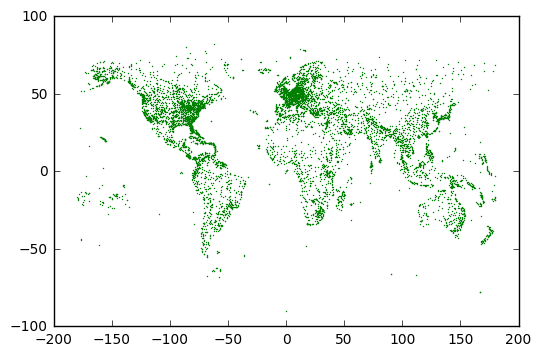

In [6]:
plt.plot(airports_df['Longitude'], airports_df['Latitude'], 'g.', markersize = 1)
plt.show()

In [7]:
geo_values = pd.concat([airports_df['Longitude'], airports_df['Latitude']], axis=1)

# K-means

In [8]:
from sklearn.cluster import KMeans

kmeans_array = []
labels_array = []
centroids_array = []
for n_clusters in range(2,8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(geo_values)
    kmeans_array.append(kmeans)
    labels_array.append(kmeans.labels_)
    centroids_array.append(kmeans.cluster_centers_)

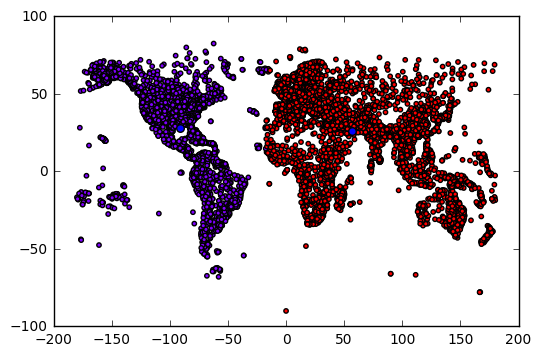

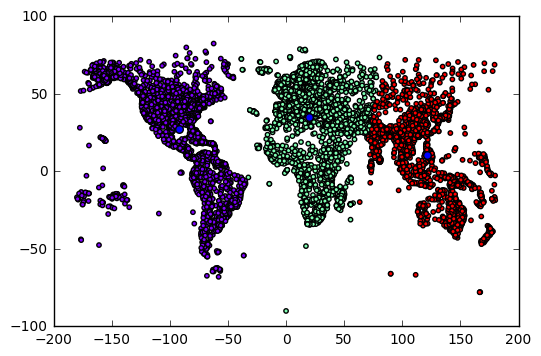

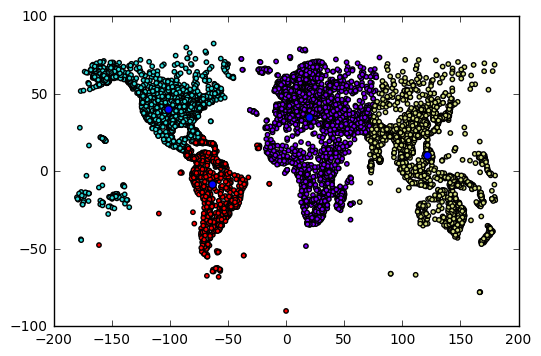

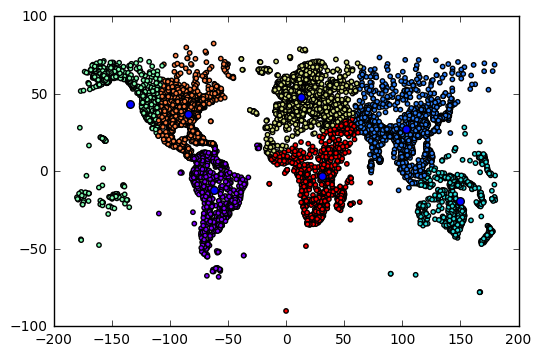

In [9]:
for i in range(len(kmeans_array)):
    labels = labels_array[i]
    centroids = centroids_array[i]
    plt.scatter(geo_values['Longitude'], geo_values['Latitude'], s=10, c = labels+1, cmap = cm.rainbow)
    plt.scatter(centroids[:,0],centroids[:,1], s=30)
    plt.show()

# Spectral clustering

In [11]:
from sklearn.cluster import SpectralClustering

spectral_array = []
labels_array = []
centroids_array = []
for n_clusters in range(2,8):
    print n_clusters
    spectral = SpectralClustering(n_clusters=n_clusters, eigen_solver='arpack', affinity="nearest_neighbors",random_state=0).fit(geo_values)
    spectral_array.append(spectral)
    labels_array.append(spectral.labels_)

2
3
4
5
6
7


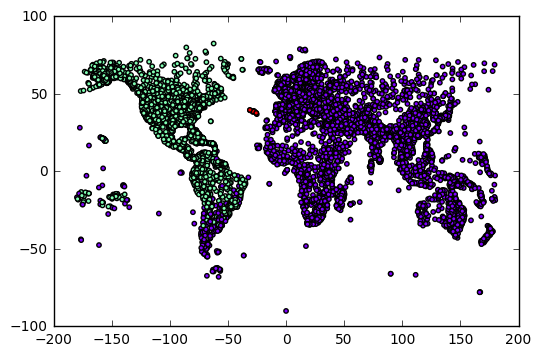

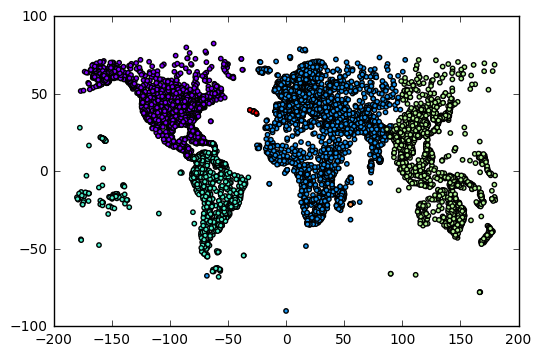

In [14]:
for i in range(len(spectral_array)):
    labels = labels_array[i]
    plt.scatter(geo_values['Longitude'], geo_values['Latitude'], s=10, c = labels+1, cmap = cm.rainbow)
    plt.show()

# Ward clustering (hierarchical)

In [17]:
from sklearn.cluster import AgglomerativeClustering

spectral_array = []
labels_array = []
centroids_array = []
for n_clusters in range(2,8):
    print n_clusters
    spectral = AgglomerativeClustering(n_clusters=n_clusters, linkage = 'ward').fit(geo_values)
    spectral_array.append(spectral)
    labels_array.append(spectral.labels_)

2
3
4
5
6
7


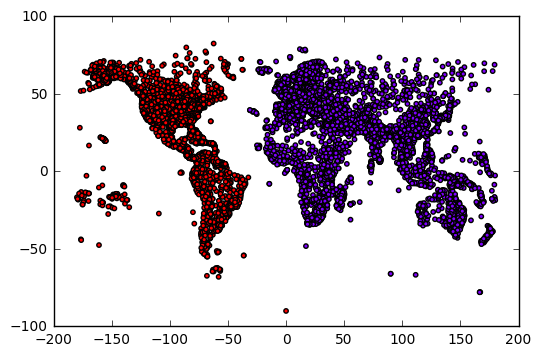

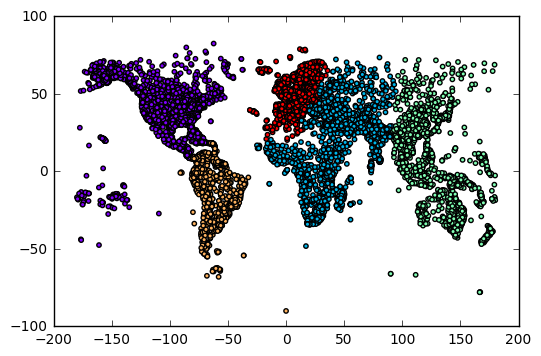

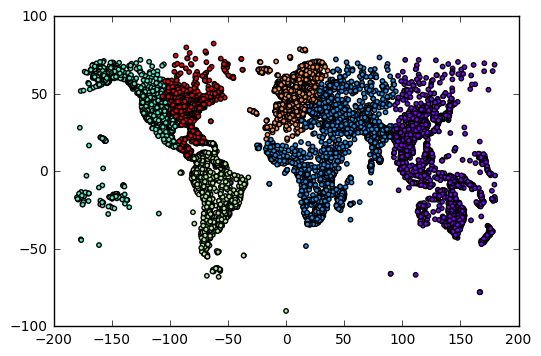

In [18]:
for i in range(len(spectral_array)):
    labels = labels_array[i]
    plt.scatter(geo_values['Longitude'], geo_values['Latitude'], s=10, c = labels+1, cmap = cm.rainbow)
    plt.show()